In [1]:
# librerias
import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.stats.api as sms

import pylab as plt
import seaborn as sns

import pylab as plt

In [106]:
data = 'exp1_banner_compra_.xlsx'
df = pd.read_excel(data)

data1 = 'exp2_ver__.xlsx'
df1 = pd.read_excel(data1)

In [107]:
df

,usuario,grupo (C/T),Quiz,Compra
0,1,control,False,True
1,2,control,True,True
2,3,control,True,True
3,4,control,True,False
4,5,control,False,True
5,6,control,True,False
6,7,control,False,True
7,8,control,True,False
8,9,control,False,False
9,10,control,True,False


In [144]:
tc1 = df.Quiz[df['grupo (C/T)']=='control'].value_counts()
tc2 = df.Quiz[df['grupo (C/T)']=='tratamiento'].value_counts()
print(tc1, tc2)

True     6
False    4
Name: Quiz, dtype: int64 False    6
True     4
Name: Quiz, dtype: int64


In [145]:
# Banners + compras
from scipy.stats import bernoulli, beta               

#grupos de testeo y control de 1
imps_ctrl, convs_ctrl = 10, 6
imps_test, convs_test= 10, 4

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [167]:
x=np.linspace(0, 1, 10000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        #plt.yticks([])
        plt.ylim(-0.5,4)
        plt.xlim(0,1)

    plt.legend()
    plt.grid()
    plt.show();

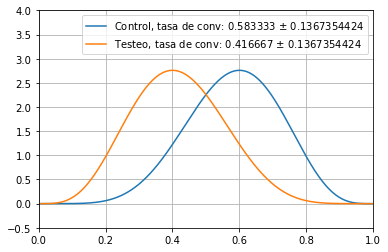

In [168]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [148]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

-0.28571428571428575

In [149]:
from mpmath import betainc   # integral de beta
from bayes import *

In [154]:
corte = calc_prob(beta_test, beta_control)

prob=betainc(a_T, b_T, corte, 1, regularized=True)

prob=float(prob)

corte

NameError: name 'd' is not defined

In [151]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un -28.57%, con una probabilidad del 95.20%'

In [169]:
tc3 = df.Compra[df['grupo (C/T)']=='control'].value_counts()
tc4 = df.Compra[df['grupo (C/T)']=='tratamiento'].value_counts()
print(tc3, tc4)

True     5
False    5
Name: Compra, dtype: int64 True     9
False    1
Name: Compra, dtype: int64


In [170]:
# Banners + compras
from scipy.stats import bernoulli, beta               

#grupos de testeo y control de 1
imps_ctrl, convs_ctrl = 10, 5
imps_test, convs_test= 10, 9

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [171]:
x=np.linspace(0, 1.1, 10000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        #plt.yticks([])
        plt.ylim(-0.5,6)
        plt.xlim(-0.1,1.1)

    plt.legend()
    plt.grid()
    plt.show();

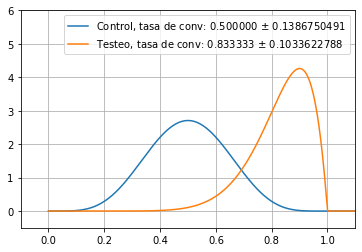

In [173]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [174]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.6666666666666667

In [175]:
corte = calc_prob(beta_control, beta_test)

prob=betainc(a_T, b_T, corte, 1, regularized=True)

prob=float(prob)

prob

0.9999999999999889

In [177]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:.2f}%'''.format(salto*100, prob*100-0.01)

'El test aumenta la tasa de conversion en un 66.67%, con una probabilidad del 99.99%'

In [45]:
df1

,usuario,grupo (C/T),Ver+
0,1,control,False
1,2,control,False
2,3,control,True
3,4,control,False
4,5,control,False
5,6,control,False
6,7,control,False
7,8,control,False
8,9,control,False
9,10,control,False


In [97]:
tc5 = df1['Ver+'][df['grupo (C/T)']=='control'].value_counts()
tc6 = df1['Ver+'][df['grupo (C/T)']=='tratamiento'].value_counts()
print(tc5, tc6)

False    9
True     1
Name: Ver+, dtype: int64 True     8
False    2
Name: Ver+, dtype: int64


In [98]:
# Banners + compras
from scipy.stats import bernoulli, beta               

#grupos de testeo y control de 1
imps_ctrl, convs_ctrl = 10, 1
imps_test, convs_test= 10, 8

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [99]:
x=np.linspace(0,1.2,10000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        #plt.yticks([])
        plt.ylim(-0.5,6)
        plt.xlim(-0.1,1.1)

    plt.legend()
    plt.grid()
    plt.show();

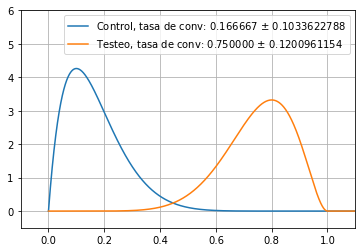

In [100]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [101]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

3.5000000000000004

In [102]:
corte = calc_prob(beta_control, beta_test)

prob=betainc(a_T, b_T, corte, 1, regularized=True)

prob=float(prob)

prob

1.0

In [103]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 350.00%, con una probabilidad del 100.00%'